In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

# code_path = Path(__file__)
code_path = Path(r'C:\Users\tianc\OneDrive\Documents\SIG\DISES\code\MPI')
datafd_path = code_path.parent.parent / 'data' / 'MPI' 
outfd_path = code_path.parent.parent / 'output' / 'data' 

## khm dhs00

#### check out raw PR data

In [2]:
dhs00_path = Path(r"C:\Users\tianc\OneDrive\Documents\SIG\DISES\data\DHS\Cambodia\STATA\KHPR42DT\KHPR42FL.DTA")
df = pd.read_stata(dhs00_path)

In [3]:
df.isna().sum()

hhid          0
hvidx         0
hv000         0
hv001         0
hv002         0
          ...  
hc61      64351
hc62      65056
hc63      64719
hc64      64369
shced1    64351
Length: 327, dtype: int64

In [4]:
all(np.sort(df.hv001.unique()) == np.arange(1, 472))  
# cluster no. ranges from 1 to 471

True

In [5]:
(df.hv004 == df.hv001).all()
# Recode IV: Ultimate area unit is a number assigned to each sample point to identify the ultimate area units used in the collection of data.  This variable is usually the same as the cluster number, but may be a sequentially numbered variable for samples with a more complicated structure. 

True

In [6]:
n_hh_per_clust = df.groupby('hv001')['hv002'].nunique()
n_hh_per_clust  # number of households in each cluster

hv001
1      18
2      18
3      18
4      18
5      19
       ..
467    26
468    28
469    12
470    31
471    27
Name: hv002, Length: 471, dtype: int64

<AxesSubplot:>

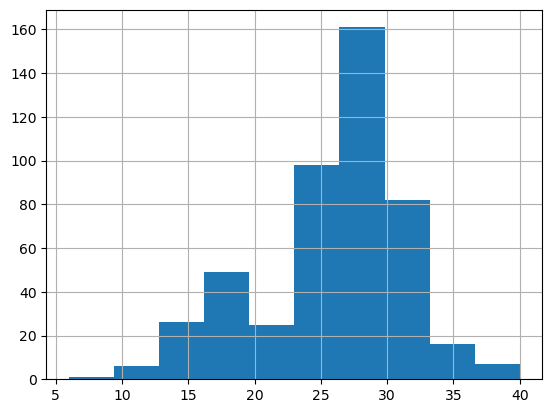

In [7]:
n_hh_per_clust.hist()

In [8]:
n_wgt_per_clust = df.groupby('hv001')['hv005'].nunique()
all(n_wgt_per_clust == 1)  # a single sample weight in each cluster

True

## khm dhs05

#### read in microdata 

##### harmonized with 10 and 14

In [2]:
df = pd.read_stata(datafd_path / 'khm_dhs05_cot' / 'khm_dhs05.dta')

##### harmonized with 10 and 14, wall material excluded 

In [3]:
df_nowall = pd.read_stata(datafd_path / 'khm_dhs05_cot_nowall' / 'khm_dhs05.dta')

#### compare

##### same except for housing indicator

In [5]:
df.columns

Index(['hh_id', 'ind_id', 'psu', 'strata', 'subsample', 'weight', 'area',
       'region', 'region_01', 'agec4', 'agec2', 'd_cm', 'd_nutr', 'd_satt',
       'd_educ', 'd_elct', 'd_wtr', 'd_sani', 'd_hsg', 'd_ckfl', 'd_asst',
       'd_cm_01', 'd_nutr_01', 'd_satt_01', 'd_educ_01', 'd_elct_01',
       'd_wtr_01', 'd_sani_01', 'd_hsg_01', 'd_ckfl_01', 'd_asst_01'],
      dtype='object')

In [6]:
df_nowall.columns

Index(['hh_id', 'ind_id', 'psu', 'strata', 'subsample', 'weight', 'area',
       'region', 'region_01', 'agec4', 'agec2', 'd_cm', 'd_nutr', 'd_satt',
       'd_educ', 'd_elct', 'd_wtr', 'd_sani', 'd_hsg', 'd_ckfl', 'd_asst',
       'd_cm_01', 'd_nutr_01', 'd_satt_01', 'd_educ_01', 'd_elct_01',
       'd_wtr_01', 'd_sani_01', 'd_hsg_01', 'd_ckfl_01', 'd_asst_01'],
      dtype='object')

In [15]:
df_bulk = df.drop(columns=['d_hsg', 'd_hsg_01'])
df_nowall_bulk = df_nowall.drop(columns=['d_hsg', 'd_hsg_01'])

In [16]:
pd.testing.assert_frame_equal(df_bulk, df_nowall_bulk)

##### difference in housing indicator

In [17]:
df.d_hsg.mean()

0.48156455909154633

In [18]:
df_nowall.d_hsg.mean()

0.30954717510164026

## khm dhs10

#### check out microdata with cluster no.


In [4]:
df = pd.read_stata(datafd_path / 'khm_dhs10' / 'khm_dhs10_clustno.dta')

In [3]:
df.shape

(37735, 33)

In [4]:
df.columns

Index(['hh_id', 'ind_id', 'psu', 'strata', 'subsample', 'weight', 'area',
       'region', 'region_01', 'agec4', 'agec2', 'headship', 'd_cm', 'd_nutr',
       'd_satt', 'd_educ', 'd_elct', 'd_wtr', 'd_sani', 'd_hsg', 'd_ckfl',
       'd_asst', 'd_cm_01', 'd_nutr_01', 'd_satt_01', 'd_educ_01', 'd_elct_01',
       'd_wtr_01', 'd_sani_01', 'd_hsg_01', 'd_ckfl_01', 'd_asst_01',
       'clust_no'],
      dtype='object')

In [5]:
df.describe()

,hh_id,ind_id,psu,weight,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,...,d_nutr_01,d_satt_01,d_educ_01,d_elct_01,d_wtr_01,d_sani_01,d_hsg_01,d_ckfl_01,d_asst_01,clust_no
count,3.773500e+04,3.773500e+04,37735.000000,37735.000000,37595.000000,36966.000000,37735.000000,37726.000000,37731.000000,37731.000000,...,36966.000000,37735.000000,37726.000000,37731.000000,37731.000000,37735.000000,37735.000000,37735.000000,37735.000000,37735.000000
mean,3.069423e+06,3.069423e+08,306.937273,0.979027,0.036042,0.379781,0.116815,0.282007,0.608889,0.449047,...,0.379781,0.116815,0.282007,0.608889,0.449047,0.617199,0.381582,0.875288,0.170876,306.937273
std,1.754140e+06,1.754140e+08,175.413859,0.697763,0.186397,0.485339,0.321204,0.449983,0.488006,0.497404,...,0.485339,0.321204,0.449983,0.488006,0.497404,0.486077,0.485781,0.330396,0.376405,175.413859
min,1.000100e+04,1.000101e+06,1.000000,0.053016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.550056e+06,1.550056e+08,155.000000,0.383321,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,155.000000
50%,3.060072e+06,3.060072e+08,306.000000,0.849375,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,306.000000
75%,4.580004e+06,4.580004e+08,458.000000,1.409156,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,458.000000
max,6.110043e+06,6.110043e+08,611.000000,3.767064,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,611.000000


In [7]:
np.sort(df.clust_no.unique())  # 1 - 611

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

In [8]:
all(df.psu == df.clust_no)

True

In [10]:
df.ind_id.is_unique

True

In [15]:
df.dropna().shape, df.shape  # less than 1000 missing

((36890, 33), (37735, 33))

In [18]:
df.loc[:, df.columns.str.startswith('d')].describe()  # indicators: 0/1

,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,d_cm_01,d_nutr_01,d_satt_01,d_educ_01,d_elct_01,d_wtr_01,d_sani_01,d_hsg_01,d_ckfl_01,d_asst_01
count,37595.000000,36966.000000,37735.000000,37726.000000,37731.000000,37731.000000,37735.000000,37735.000000,37735.000000,37735.000000,37595.000000,36966.000000,37735.000000,37726.000000,37731.000000,37731.000000,37735.000000,37735.000000,37735.000000,37735.000000
mean,0.036042,0.379781,0.116815,0.282007,0.608889,0.449047,0.617199,0.381582,0.875288,0.170876,0.036042,0.379781,0.116815,0.282007,0.608889,0.449047,0.617199,0.381582,0.875288,0.170876
std,0.186397,0.485339,0.321204,0.449983,0.488006,0.497404,0.486077,0.485781,0.330396,0.376405,0.186397,0.485339,0.321204,0.449983,0.488006,0.497404,0.486077,0.485781,0.330396,0.376405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### a single sample weight in each cluster?

In [6]:
df = pd.read_stata(datafd_path / 'khm_dhs10' / 'khm_dhs10_clustno.dta')

In [19]:
n_wgt_per_hh = df.groupby('hh_id')['weight'].nunique()
all(n_wgt_per_hh == 1)

True

### sanity check outputs from dropping of housing indicator

#### read in microdata 

In [2]:
YY = '10'

##### harmonized with 05 and 14

In [3]:
df = pd.read_stata(datafd_path / f'khm_dhs{YY}_cot' / f'khm_dhs{YY}.dta')

##### harmonized with 05 and 14, wall material excluded 

In [4]:
df_nowall = pd.read_stata(datafd_path / f'khm_dhs{YY}_cot_nowall' / f'khm_dhs{YY}.dta')

#### compare

##### same except for housing indicator

In [5]:
df.columns

Index(['hh_id', 'ind_id', 'psu', 'strata', 'subsample', 'weight', 'area',
       'region', 'region_01', 'agec4', 'agec2', 'd_cm', 'd_nutr', 'd_satt',
       'd_educ', 'd_elct', 'd_wtr', 'd_sani', 'd_hsg', 'd_ckfl', 'd_asst',
       'd_cm_01', 'd_nutr_01', 'd_satt_01', 'd_educ_01', 'd_elct_01',
       'd_wtr_01', 'd_sani_01', 'd_hsg_01', 'd_ckfl_01', 'd_asst_01'],
      dtype='object')

In [6]:
df_nowall.columns

Index(['hh_id', 'ind_id', 'psu', 'strata', 'subsample', 'weight', 'area',
       'region', 'region_01', 'agec4', 'agec2', 'd_cm', 'd_nutr', 'd_satt',
       'd_educ', 'd_elct', 'd_wtr', 'd_sani', 'd_hsg', 'd_ckfl', 'd_asst',
       'd_cm_01', 'd_nutr_01', 'd_satt_01', 'd_educ_01', 'd_elct_01',
       'd_wtr_01', 'd_sani_01', 'd_hsg_01', 'd_ckfl_01', 'd_asst_01'],
      dtype='object')

In [7]:
df_bulk = df.drop(columns=['d_hsg', 'd_hsg_01'])
df_nowall_bulk = df_nowall.drop(columns=['d_hsg', 'd_hsg_01'])

In [8]:
pd.testing.assert_frame_equal(df_bulk, df_nowall_bulk)

##### difference in housing indicator

In [9]:
df.d_hsg.mean()

0.38330462435404794

In [10]:
df_nowall.d_hsg.mean()

0.1763879687292964

## khm dhs14

### sanity check outputs from dropping of housing indicator

#### read in microdata 

In [11]:
YY = '14'

##### harmonized with 10 and 05

In [12]:
df = pd.read_stata(datafd_path / f'khm_dhs{YY}_cot' / f'khm_dhs{YY}.dta')

##### harmonized with 10 and 05, wall material excluded 

In [13]:
df_nowall = pd.read_stata(datafd_path / f'khm_dhs{YY}_cot_nowall' / f'khm_dhs{YY}.dta')

#### compare

##### same except for housing indicator

In [14]:
df.columns

Index(['hh_id', 'ind_id', 'psu', 'strata', 'subsample', 'weight', 'area',
       'region', 'region_01', 'agec4', 'agec2', 'd_cm', 'd_nutr', 'd_satt',
       'd_educ', 'd_elct', 'd_wtr', 'd_sani', 'd_hsg', 'd_ckfl', 'd_asst',
       'd_cm_01', 'd_nutr_01', 'd_satt_01', 'd_educ_01', 'd_elct_01',
       'd_wtr_01', 'd_sani_01', 'd_hsg_01', 'd_ckfl_01', 'd_asst_01'],
      dtype='object')

In [15]:
df_nowall.columns

Index(['hh_id', 'ind_id', 'psu', 'strata', 'subsample', 'weight', 'area',
       'region', 'region_01', 'agec4', 'agec2', 'd_cm', 'd_nutr', 'd_satt',
       'd_educ', 'd_elct', 'd_wtr', 'd_sani', 'd_hsg', 'd_ckfl', 'd_asst',
       'd_cm_01', 'd_nutr_01', 'd_satt_01', 'd_educ_01', 'd_elct_01',
       'd_wtr_01', 'd_sani_01', 'd_hsg_01', 'd_ckfl_01', 'd_asst_01'],
      dtype='object')

In [16]:
df_bulk = df.drop(columns=['d_hsg', 'd_hsg_01'])
df_nowall_bulk = df_nowall.drop(columns=['d_hsg', 'd_hsg_01'])

In [17]:
pd.testing.assert_frame_equal(df_bulk, df_nowall_bulk)

##### difference in housing indicator

In [18]:
df.d_hsg.mean()

0.3243733956633345

In [19]:
df_nowall.d_hsg.mean()

0.12132406653726546